In [ ]:
%pip install scikit-learn==1.6.1 matplotlib seaborn pandas

                                              0.0/11.1 MB ? eta -:--:--
     -                                        0.5/11.1 MB 14.2 MB/s eta 0:00:01
     ----                                     1.3/11.1 MB 16.9 MB/s eta 0:00:01
     -------                                  2.0/11.1 MB 16.1 MB/s eta 0:00:01
     ----------                               2.8/11.1 MB 16.3 MB/s eta 0:00:01
     -------------                            3.8/11.1 MB 17.3 MB/s eta 0:00:01
     -----------------                        4.8/11.1 MB 17.9 MB/s eta 0:00:01
     --------------------                     5.7/11.1 MB 18.4 MB/s eta 0:00:01
     ------------------------                 6.9/11.1 MB 19.2 MB/s eta 0:00:01
     -----------------------------            8.1/11.1 MB 20.0 MB/s eta 0:00:01
     ---------------------------------        9.4/11.1 MB 20.7 MB/s eta 0:00:01
     -------------------------------------   10.8/11.1 MB 22.6 MB/s eta 0:00:01
     --------------------------------------  11.


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\Marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Exploratory data analysis

As usual, we start by taking at look at the dataset.

* IDS_mapping.csv file isn't structured as a normal CSV because it contains multiple tables within one file

In [3]:
# Load the data
ids_mapping = pd.read_csv("./data/IDS_mapping.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
ids_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


🔍 Solution: Read and Split the File Correctly
Since Pandas can’t read it directly, we need to:

1. Read the file as raw text.
2. Split it into separate dataframes based on blank lines.
3. Process and clean each dataframe.

In [4]:
# Read the raw file
with open("./data/IDS_mapping.csv", "r") as f:
    lines = f.read().split("\n")  # Split by line

📌 Identify the Different Tables in "IDS_mapping.csv"

Each section has:

* A header (column names) followed by data.
* A comma line separating different tables.

We need to extract:

1. admission_type_id mapping
2. discharge_disposition_id mapping
3. admission_source_id mapping

In [5]:
# Find table starting points
tables = []
current_table = []

for line in lines:
    if line != ',':  # If line is NOT a comma
        current_table.append(line)
    else:  # If empty line, save previous table and start new
        if current_table:
            tables.append(current_table)
            current_table = []

# Add last table if exists
if current_table:
    tables.append(current_table)

# Check how many tables were found
print(f"Found {len(tables)} tables")
admission_type_id = tables[0]
discharge_disposition_id = tables[1]
admission_source_id = tables[2]

print(admission_type_id)
print(discharge_disposition_id) 
print(admission_source_id)


Found 3 tables
['admission_type_id,description', '1,Emergency', '2,Urgent', '3,Elective', '4,Newborn', '5,Not Available', '6,NULL', '7,Trauma Center', '8,Not Mapped']
['discharge_disposition_id,description', '1,Discharged to home', '2,Discharged/transferred to another short term hospital', '3,Discharged/transferred to SNF', '4,Discharged/transferred to ICF', '5,Discharged/transferred to another type of inpatient care institution', '6,Discharged/transferred to home with home health service', '7,Left AMA', '8,Discharged/transferred to home under care of Home IV provider', '9,Admitted as an inpatient to this hospital', '10,Neonate discharged to another hospital for neonatal aftercare', '11,Expired', '12,Still patient or expected to return for outpatient services', '13,Hospice / home', '14,Hospice / medical facility', '15,Discharged/transferred within this institution to Medicare approved swing bed', '16,Discharged/transferred/referred another institution for outpatient services', '17,Disc

#### admission_type_id table extraction

In [6]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in admission_type_id]

# Define the output CSV file name
output_file_admission_type_id = './output_data/admission_type_id.csv'

# Write to CSV
with open(output_file_admission_type_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_admission_type_id}' created successfully.")

CSV file './output_data/admission_type_id.csv' created successfully.


In [12]:
# Load the data admission_type_id
admission_type_id = pd.read_csv("./output_data/admission_type_id.csv")
pd.set_option('display.max_rows', None)  # Display all rows
admission_type_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [27]:
# Load dataset
diabetic_data = pd.read_csv("./data/diabetic_data.csv")

pd.set_option('display.max_columns', None)  # Display all cols

# Display first few rows
display(diabetic_data.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### discharge_disposition_id table extraction

In [13]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in discharge_disposition_id]

# Define the output CSV file name
output_file_discharge_disposition_id = './output_data/discharge_disposition_id.csv'

# Write to CSV
with open(output_file_discharge_disposition_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_discharge_disposition_id}' created successfully.")

CSV file './output_data/discharge_disposition_id.csv' created successfully.


In [15]:
# Load the data discharge_disposition_id
discharge_disposition_id = pd.read_csv("./output_data/discharge_disposition_id.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
discharge_disposition_id

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


#### admission_source_id table extraction

In [16]:
import csv

# Split the list into rows (each entry in the list represents a row in the CSV)
rows = [row.split(',') for row in admission_source_id]

# Define the output CSV file name
output_file_admission_source_id = './output_data/admission_source_id.csv'

# Write to CSV
with open(output_file_admission_source_id, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"CSV file '{output_file_admission_source_id}' created successfully.")

CSV file './output_data/admission_source_id.csv' created successfully.


In [17]:
# Load the data admission_source_id
admission_source_id = pd.read_csv("./output_data/admission_source_id.csv", quotechar='"')
pd.set_option('display.max_rows', None)  # Display all rows
admission_source_id

,admission_source_id,description
0,1.0,Physician Referral
1,2.0,Clinic Referral
2,3.0,HMO Referral
3,4.0,Transfer from a hospital
4,5.0,Transfer from a Skilled Nursing Facility (SNF)
5,6.0,Transfer from another health care facility
6,7.0,Emergency Room
7,8.0,Court/Law Enforcement
8,9.0,Not Available
9,10.0,Transfer from critial access hospital


### Task 1: Dataset description (15%)
1.1 Describe the characteristics of the dataset (e.g. data types, sample-to-features ratio) and
use descriptive statistics and figures/plots to show the dataset characteristics.

1.2 Describe the challenges with the dataset (e.g. missing data, unbalanced classes). (5%)

---

1.1 and 1.2 Identify Data Characteristics, and describe the challenges within the dataset:
* a. Data Types: Determine whether the features in your dataset are numerical (e.g., integers, floats) or categorical (e.g., strings, boolean values).
* b. Sample-to-Feature Ratio: This refers to the number of samples (rows) in the dataset relative to the number of features (columns). A common ratio is to have more samples than features, but some datasets might have more features than samples.
* c. Missing Values: Check if there are missing values in any of the features and how they are handled.
* d. Outliers: Look for any outliers or unusual values in the dataset that might affect analysis.

In [63]:
# Replace missing values with NaN

# Define a list of common placeholders
placeholders = ['?', 'NA', 'none', 'N/A', 'null']

diabetic_data_placeholders_substituted = diabetic_data.copy(deep=True)

# Replace all placeholder values with NaN across the entire DataFrame
diabetic_data_placeholders_substituted.replace(placeholders, None, inplace=True)

In [44]:
print("Missing Values in Each Feature:")
missing_values = diabetic_data_placeholders_substituted.isnull().sum()
print(missing_values)
# Check for missing values

Missing Values in Each Feature:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride     

In [45]:
diabetic_data_placeholders_substituted.to_csv('./test_replacing_placeholders_with_nan.csv', sep=',', index=False, encoding='utf-8')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


def analyze_dataframe(df, df_name="DataFrame"):
    # a. Identify Data Types for every CSV file
    print(f"{df_name} - Data Types of Features:")
    print(df.dtypes)
    print(f"{df_name} - Shape: " , df.shape)

    # b. Sample-to-Feature Ratio
    num_samples = df.shape[0]  # Number of rows (samples)
    num_features = df.shape[1]  # Number of columns (features)
    print(f"\n{df_name} - Sample-to-Feature Ratio:")
    print(f"Number of Samples: {num_samples}")
    print(f"Number of Features: {num_features}")
    print(f"Sample-to-Feature Ratio: {num_samples / num_features:.2f}")

    # c. Missing Values
    print(f"\n{df_name} - Missing Values in Each Feature:")
    missing_values = df.isnull().sum()
    print(missing_values)



In [47]:
# Analyze the diabetic_data.csv DataFrame
analyze_dataframe(diabetic_data, "diabetic_data.csv DataFrame")

diabetic_data.csv DataFrame - Data Types of Features:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
c

In [24]:
# Analyze the admission_source_id.csv DataFrame
analyze_dataframe(admission_source_id, "admission_source_id.csv DataFrame")

admission_source_id.csv DataFrame - Data Types of Features:
admission_source_id    float64
description             object
dtype: object
admission_source_id.csv DataFrame - Shape:  (26, 2)

admission_source_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 26
Number of Features: 2
Sample-to-Feature Ratio: 13.00

admission_source_id.csv DataFrame - Missing Values in Each Feature:
admission_source_id    1
description            2
dtype: int64


In [ ]:
# Analyze the admission_type_id.csv DataFrame
analyze_dataframe(admission_type_id, "admission_type_id.csv DataFrame")

admission_type_id.csv DataFrame - Data Types of Features:
admission_type_id     int64
description          object
dtype: object
admission_type_id.csv DataFrame - Shape:  (8, 2)

admission_type_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 8
Number of Features: 2
Sample-to-Feature Ratio: 4.00

admission_type_id.csv DataFrame - Missing Values in Each Feature:
admission_type_id    0
description          1
dtype: int64


In [ ]:
# Analyze the discharge_disposition_id.csv DataFrame
analyze_dataframe(discharge_disposition_id, "discharge_disposition_id.csv DataFrame")

discharge_disposition_id.csv DataFrame - Data Types of Features:
discharge_disposition_id     int64
description                 object
dtype: object
discharge_disposition_id.csv DataFrame - Shape:  (30, 2)

discharge_disposition_id.csv DataFrame - Sample-to-Feature Ratio:
Number of Samples: 30
Number of Features: 2
Sample-to-Feature Ratio: 15.00

discharge_disposition_id.csv DataFrame - Missing Values in Each Feature:
discharge_disposition_id    0
description                 1
dtype: int64


#### Visualise distributions

We can now plot some graphs showing the data distribution for all features in the dataset.
There are quite a few features in the dataset: we split them in different groups when plotting their distributions.

In [48]:
# Check the categories
print(diabetic_data_placeholders_substituted.nunique())  # Check unique values per column
print(diabetic_data_placeholders_substituted.dtypes)  # Check data types

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                           9
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

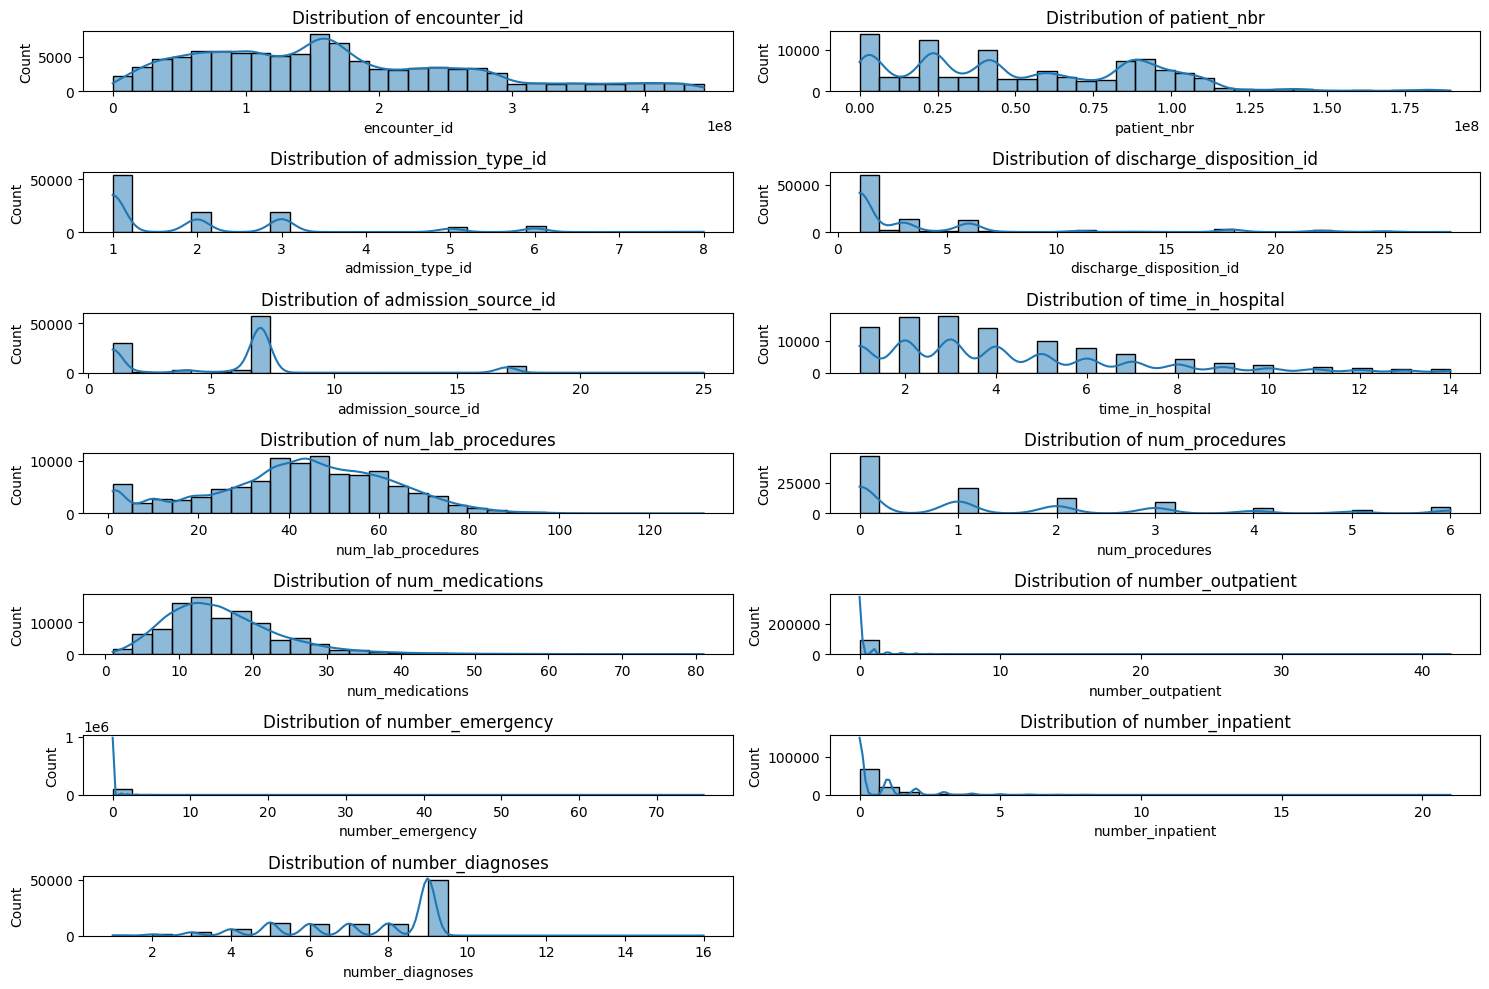

In [58]:
# Selecting numerical columns
numerical_cols = diabetic_data_placeholders_substituted.select_dtypes(include=['int64', 'float64']).columns
num_cols = 2
num_rows = (len(numerical_cols) // num_cols) + (1 if len(numerical_cols) % num_cols > 0 else 0)

# Plot distributions for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(diabetic_data_placeholders_substituted[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


C:\Users\Marco\AppData\Local\Temp\ipykernel_1772\1338700648.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, num_cols, i + 1)


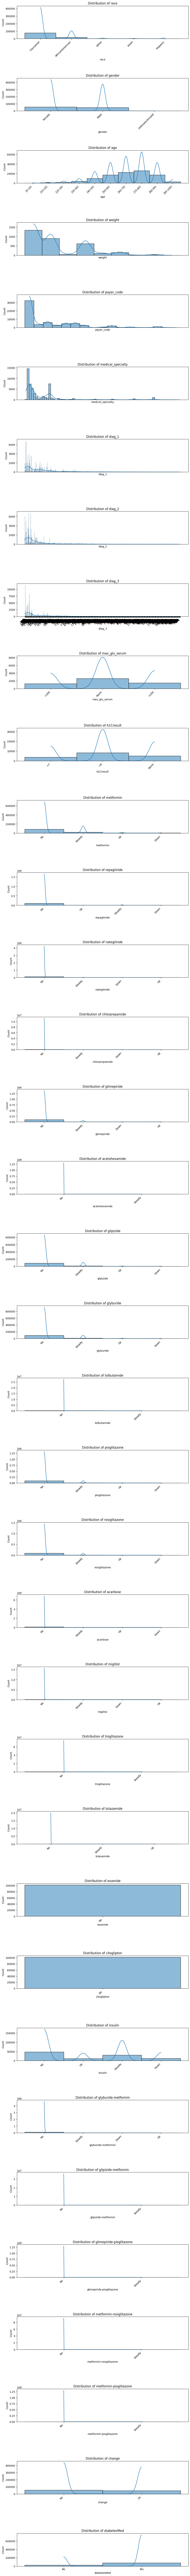

In [92]:
# Select all columns excluding the numerical ones
diabetic_data_placeholders_substituted_nolabel = diabetic_data_placeholders_substituted.drop(columns='readmitted', inplace=False)
non_numerical_cols = diabetic_data_placeholders_substituted_nolabel.drop(columns=numerical_cols).columns

num_cols = 1
num_rows = (len(non_numerical_cols) // num_cols) + (1 if len(non_numerical_cols) % num_cols > 0 else 0)


# Plot distributions for numerical columns
plt.figure(figsize=(12, 5 * num_rows))
for i, col in enumerate(non_numerical_cols):

    distinct_count = diabetic_data_placeholders_substituted_nolabel[col].nunique()
    if col == 'diag_3':
        plt.xticks([], []) 
        
    if diabetic_data_placeholders_substituted_nolabel[col].nunique() > 10:  # Threshold for high-cardinality categories
        plt.xticks([], [])  # Hide x-axis labels
    plt.xticks(rotation=45, ha="right")
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(diabetic_data_placeholders_substituted_nolabel[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.subplots_adjust(hspace=1.2, wspace=0.3)
plt.show()

### Outliers dectection afterward handling missing values: - Part 1.2 Dataset Challenges
While ignoring NaN values in Z-score computation might be appropriate in certain cases (e.g., when missing values are rare and unlikely to significantly affect the results), it's generally better to address missing values beforehand to avoid potential bias or inaccuracies in outlier detection. Imputation or removal of missing data are common strategies that help ensure the Z-scores more accurately reflect the underlying distribution.

In [ ]:
def outliers_dataframe(df, df_name="DataFrame"):
    # d. Outliers Detection (using Z-Score method)
    print(f"\n{df_name} - Outliers Detection (Z-score > 3):")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        # Calculate Z-scores for numeric columns
        z_scores = np.abs(zscore(df[numeric_cols], nan_policy='omit'))  # Ignore NaNs in Z-score calculation
        outliers = (z_scores > 3).sum(axis=0)  # Count the number of outliers per numeric column
        for col, outlier_count in zip(numeric_cols, outliers):
            print(f"{col}: {outlier_count} outliers")
        
        # 6. Plotting Boxplots for Outliers Detection
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(2, 3, i)  # 2 rows, 3 columns for plotting
            df[col].plot(kind='box', title=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No numeric columns available for outlier detection in {df_name}.") 

### Visualise distributions

We can now plot some graphs showing the data distribution for all features in the dataset.

In [ ]:
readmitted is the label column

Todo: try to follow week4

TODO: Does it make sense to join the three csv with the diabetic_data.csv ?
* I could try to compute EDA and see if join them it's needed during this phase
* I could try to train the model and see later if it's needed to join them